##1 - Importação das Libs e verificações iniciais

In [1]:
import seaborn as sns, pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df_titanic = sns.load_dataset("titanic")

In [3]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df_titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_titanic.shape

(891, 15)

##2 - Limpeza de Dados

In [7]:
df_titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


<Axes: >

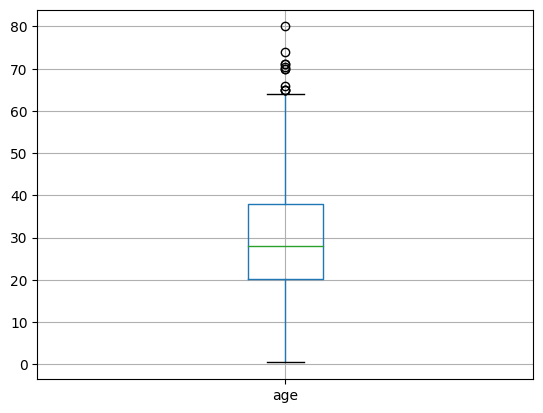

In [8]:
df_titanic.boxplot(column=["age"])

In [9]:
df_titanic["age"][df_titanic["age"] >= 60].count()

26

In [10]:
q3 = df_titanic["age"].quantile(.75)
q1 = df_titanic["age"].quantile(.25)
qdiff = q3 - q1
upper_limit = q3 + 1.5 * qdiff
lower_limit = q1 - 1.5 * qdiff
df_titanic_q = df_titanic[(df_titanic["age"] <= upper_limit) & (df_titanic["age"] >= lower_limit)]

<Axes: >

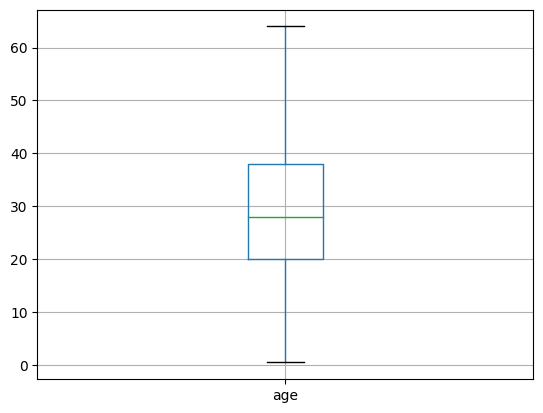

In [11]:
df_titanic_q.boxplot(column=["age"])

In [12]:
df_titanic_q.shape

(703, 15)

In [13]:
df_titanic_q.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


##3 - Feature Engineering

In [14]:
df_titanic_selected = df_titanic_q[["pclass", "sex", "age", "fare", "survived"]]

In [15]:
df_titanic_selected = pd.get_dummies(df_titanic_selected, dtype=int, drop_first=True)

In [16]:
df_titanic_selected.head()

,pclass,age,fare,survived,sex_male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


##4 - Separação treino/teste

In [17]:
X = df_titanic_selected[["pclass", "sex_male", "age", "fare"]]
y = df_titanic_selected["survived"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##5 - Predições

In [19]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

##6 - Métricas de desempenho

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')

Acurácia: 0.66


In [21]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[90 26]
 [45 50]]
